# 텍스트 마이닝_3  
* 참조 : 잡아라! 텍스트마이닝 with 파이썬

# 1. 빈도 분석

In [1]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

* 트럼프 대통령 취임 연설문

In [2]:
f = open('트럼프취임연설문.txt', 'r')
lines = f.readline()
f.close()
lines[0:100]

' Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow'

In [3]:
tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')
words = lines.lower()
tokens = tokenizer.tokenize(words)
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

pd.Series(stopped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
every        7
nation       7
new          6
great        6
never        6
dtype: int64

* 문재인 대통령 취임 연설문

In [4]:
import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum()

In [5]:
f = open('문재인대통령취임연설문.txt','r')
lines=f.readlines()
f.close()

In [6]:
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))

In [7]:
def flatten(l):
    flatList =[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(temp)
word_list = pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(10)

대통령     29
국민      19
대한민국     9
우리       8
여러분      7
국민들      6
나라       6
역사       6
대통령의     5
세상       5
dtype: int64

* wordcloud

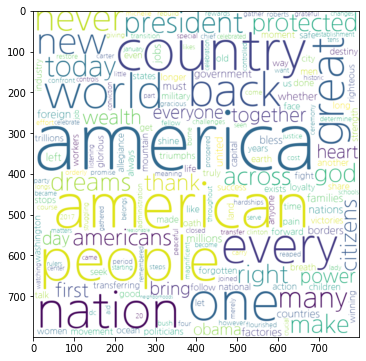

In [17]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

font_path = 'C:/Windows/Fonts/NanumGothicLight.ttf'

wordcloud = WordCloud(font_path = font_path,
                     width = 800,
                     height = 800,
                     background_color = 'white')

count = Counter(stopped_tokens2)
wordcloud = wordcloud.generate_from_frequencies(count)

def __array__(self):
    return self.to_array()

def to_array(self):
    return np.array(self.to_image())

array = wordcloud.to_array()

fig = plt.figure(figsize=(6,6))
plt.imshow(array, interpolation='bilinear')
plt.show()
fig.savefig('wordcloud.png')

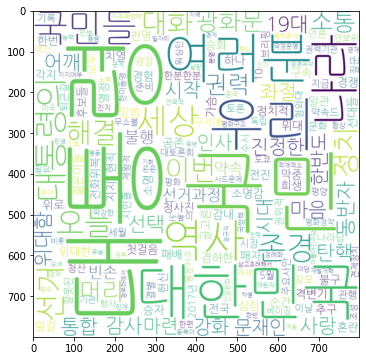

In [18]:
count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)

array = wordcloud.to_array()

fig = plt.figure(figsize=(6,6))
plt.imshow(array, interpolation='bilinear')
plt.show()
fig.savefig('wordcloud.png')